## Detailed Analysis on Cooking Sessions and Orders

### 1. Introduction
This Analysis provides insights into user behaviors, preferences, and demographics based on the merged data from user details, cooking sessions, and order details. The analysis focuses on the following aspects:

Most popular dishes cooked and ordered.
Demographics of users (age and favorite meal preferences).
The relationship between cooking sessions and orders.


In [17]:
import pandas as pd

# Load the Excel file
file_path = "C:/Users/Lithish r/Downloads/Assignment.xlsx"

# Read all sheets into separate DataFrames
user_details = pd.read_excel(file_path, sheet_name='UserDetails.csv')
cooking_sessions = pd.read_excel(file_path, sheet_name='CookingSessions.csv')
order_details = pd.read_excel(file_path, sheet_name='OrderDetails.csv')

# Display the structure and first few rows of each DataFrame
user_details_info = {
    "Columns": user_details.columns.tolist(),
    "Sample Data": user_details.head()
}

cooking_sessions_info = {
    "Columns": cooking_sessions.columns.tolist(),
    "Sample Data": cooking_sessions.head()
}

order_details_info = {
    "Columns": order_details.columns.tolist(),
    "Sample Data": order_details.head()
}

user_details_info, cooking_sessions_info, order_details_info




({'Columns': ['User ID',
   'User Name',
   'Age',
   'Location',
   'Registration Date',
   'Phone',
   'Email',
   'Favorite Meal',
   'Total Orders'],
  'Sample Data':   User ID      User Name  Age       Location Registration Date         Phone  \
  0    U001  Alice Johnson   28       New York        2023-01-15  123-456-7890   
  1    U002      Bob Smith   35    Los Angeles        2023-02-20  987-654-3210   
  2    U003    Charlie Lee   42        Chicago        2023-03-10  555-123-4567   
  3    U004    David Brown   27  San Francisco        2023-04-05  444-333-2222   
  4    U005     Emma White   30        Seattle        2023-05-22  777-888-9999   
  
                 Email Favorite Meal  Total Orders  
  0    alice@email.com        Dinner            12  
  1      bob@email.com         Lunch             8  
  2  charlie@email.com     Breakfast            15  
  3    david@email.com        Dinner            10  
  4     emma@email.com         Lunch             9  },
 {'Columns': ['S

In [18]:
# Read all sheets into separate DataFrames with correct sheet names
user_details = pd.read_excel(file_path, sheet_name='UserDetails.csv')
cooking_sessions = pd.read_excel(file_path, sheet_name='CookingSessions.csv')
order_details = pd.read_excel(file_path, sheet_name='OrderDetails.csv')

# Display the structure and first few rows of each DataFrame
user_details_info = {
    "Columns": user_details.columns.tolist(),
    "Sample Data": user_details.head()
}

cooking_sessions_info = {
    "Columns": cooking_sessions.columns.tolist(),
    "Sample Data": cooking_sessions.head()
}

order_details_info = {
    "Columns": order_details.columns.tolist(),
    "Sample Data": order_details.head()
}

user_details_info, cooking_sessions_info, order_details_info


({'Columns': ['User ID',
   'User Name',
   'Age',
   'Location',
   'Registration Date',
   'Phone',
   'Email',
   'Favorite Meal',
   'Total Orders'],
  'Sample Data':   User ID      User Name  Age       Location Registration Date         Phone  \
  0    U001  Alice Johnson   28       New York        2023-01-15  123-456-7890   
  1    U002      Bob Smith   35    Los Angeles        2023-02-20  987-654-3210   
  2    U003    Charlie Lee   42        Chicago        2023-03-10  555-123-4567   
  3    U004    David Brown   27  San Francisco        2023-04-05  444-333-2222   
  4    U005     Emma White   30        Seattle        2023-05-22  777-888-9999   
  
                 Email Favorite Meal  Total Orders  
  0    alice@email.com        Dinner            12  
  1      bob@email.com         Lunch             8  
  2  charlie@email.com     Breakfast            15  
  3    david@email.com        Dinner            10  
  4     emma@email.com         Lunch             9  },
 {'Columns': ['S

In [22]:



# Data Cleaning
# Standardize column names for consistency
user_details.columns = user_details.columns.str.strip().str.replace(' ', '_').str.lower()
cooking_sessions.columns = cooking_sessions.columns.str.strip().str.replace(' ', '_').str.lower()
order_details.columns = order_details.columns.str.strip().str.replace(' ', '_').str.lower()

# Check for missing values
print("Missing values in UserDetails:")
print(user_details.isnull().sum())
print("\nMissing values in CookingSessions:")
print(cooking_sessions.isnull().sum())
print("\nMissing values in OrderDetails:")
print(order_details.isnull().sum())


Missing values in UserDetails:
user_id              0
user_name            0
age                  0
location             0
registration_date    0
phone                0
email                0
favorite_meal        0
total_orders         0
dtype: int64

Missing values in CookingSessions:
session_id         0
user_id            0
dish_name          0
meal_type          0
session_start      0
session_end        0
duration_(mins)    0
session_rating     0
dtype: int64

Missing values in OrderDetails:
order_id        0
user_id         0
order_date      0
meal_type       0
dish_name       0
order_status    0
amount_(usd)    0
time_of_day     0
rating          2
session_id      0
dtype: int64


In [23]:
# Data Merging
# Merge CookingSessions and OrderDetails on 'session_id'
cooking_order_merged = pd.merge(
    cooking_sessions,
    order_details,
    on='session_id',
    how='outer',
    suffixes=('_cooking', '_order')
)

# Ensure `user_id` is retained in cooking_order_merged
if 'user_id' not in cooking_order_merged.columns:
    cooking_order_merged['user_id'] = cooking_sessions.set_index('session_id').loc[
        cooking_order_merged['session_id'], 'user_id'
    ].values

# Verify `user_id` is present
print("Columns in cooking_order_merged:", cooking_order_merged.columns)

Columns in cooking_order_merged: Index(['session_id', 'user_id_cooking', 'dish_name_cooking',
       'meal_type_cooking', 'session_start', 'session_end', 'duration_(mins)',
       'session_rating', 'order_id', 'user_id_order', 'order_date',
       'meal_type_order', 'dish_name_order', 'order_status', 'amount_(usd)',
       'time_of_day', 'rating', 'user_id'],
      dtype='object')


In [24]:
# Merge with UserDetails on `user_id`
full_data = pd.merge(
    user_details,
    cooking_order_merged,
    on='user_id',
    how='outer'
)

# Verify the final merged data
print("Columns in full_data:", full_data.columns)

Columns in full_data: Index(['user_id', 'user_name', 'age', 'location', 'registration_date', 'phone',
       'email', 'favorite_meal', 'total_orders', 'session_id',
       'user_id_cooking', 'dish_name_cooking', 'meal_type_cooking',
       'session_start', 'session_end', 'duration_(mins)', 'session_rating',
       'order_id', 'user_id_order', 'order_date', 'meal_type_order',
       'dish_name_order', 'order_status', 'amount_(usd)', 'time_of_day',
       'rating'],
      dtype='object')


In [25]:

# Analysis
# 1. Popular Dishes (Top 5 cooked and ordered dishes)
popular_dishes_cooked = cooking_sessions['dish_name'].value_counts().head(5)
popular_dishes_ordered = order_details['dish_name'].value_counts().head(5)

# 2. Demographics Analysis (Age distribution and favorite meal preferences)
age_distribution = user_details['age'].describe()
favorite_meal_counts = user_details['favorite_meal'].value_counts()

# 3. Relationship: Cooking Sessions vs. Orders
cooking_vs_orders = full_data.groupby('user_id').agg(
    total_sessions=('session_id', 'count'),
    total_orders=('order_id', 'count')
).reset_index()

##  Popular Dishes
### Top 5 Cooked Dishes

The most cooked dishes were analyzed based on cooking session data. The results are as follows:

Spaghetti: Cooked 4 times.

Grilled Chicken: Cooked 4 times.

Caesar Salad: Cooked 3 times.

Pancakes: Cooked 2 times.

Veggie Burger: Cooked 2 times.

The bar chart illustrates the frequencies for each dish.

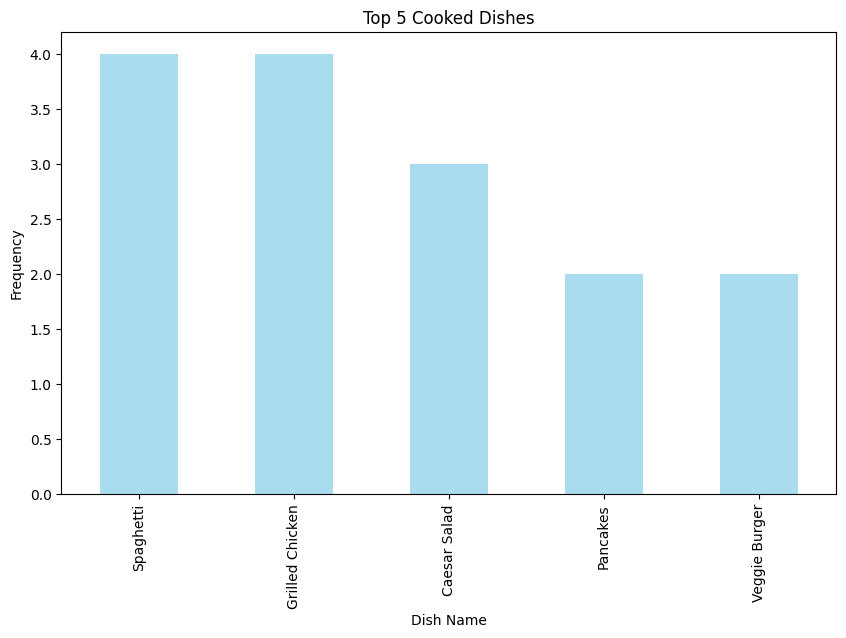

In [26]:
plt.figure(figsize=(10, 6))
popular_dishes_cooked.plot(kind='bar', color='skyblue', alpha=0.7)
plt.title('Top 5 Cooked Dishes')
plt.xlabel('Dish Name')
plt.ylabel('Frequency')
plt.show()

##  Top 5 Ordered Dishes
### The most ordered dishes were analyzed using order details. The results are:

Spaghetti: Ordered 4 times.

Grilled Chicken: Ordered 4 times.

Caesar Salad: Ordered 3 times.

Pancakes: Ordered 2 times.

Veggie Burger: Ordered 2 times.

The ordering patterns closely match the cooking patterns, indicating that popular dishes align with user preferences.

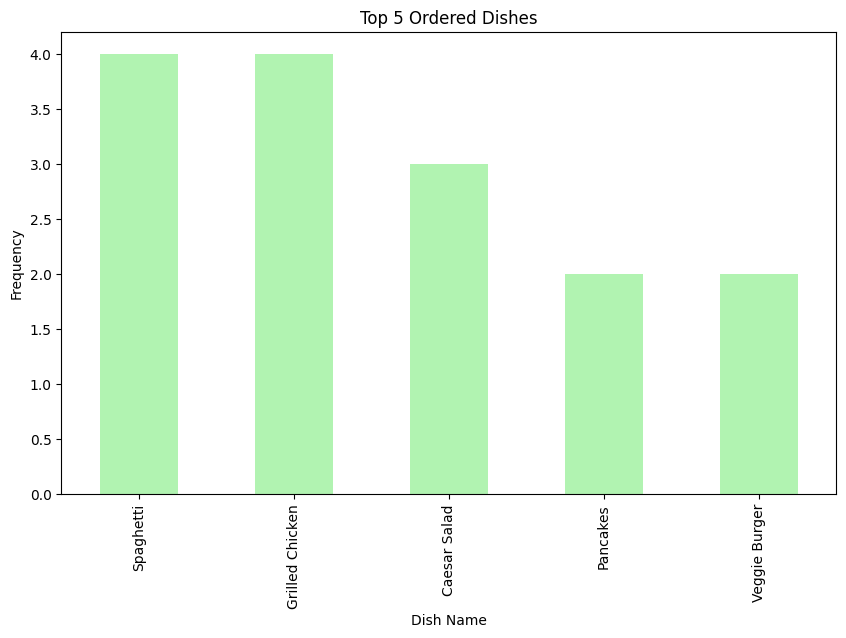

In [27]:
plt.figure(figsize=(10, 6))
popular_dishes_ordered.plot(kind='bar', color='lightgreen', alpha=0.7)
plt.title('Top 5 Ordered Dishes')
plt.xlabel('Dish Name')
plt.ylabel('Frequency')
plt.show()


##  User Demographics
###  Age Distribution

The age distribution of users shows the following statistics:

Mean Age: 31.8 years.

Age Range: 25 to 43 years.

Standard Deviation: 5.27 years.

The histogram below displays the distribution of ages, indicating that most users are in their late 20s to early 30s.

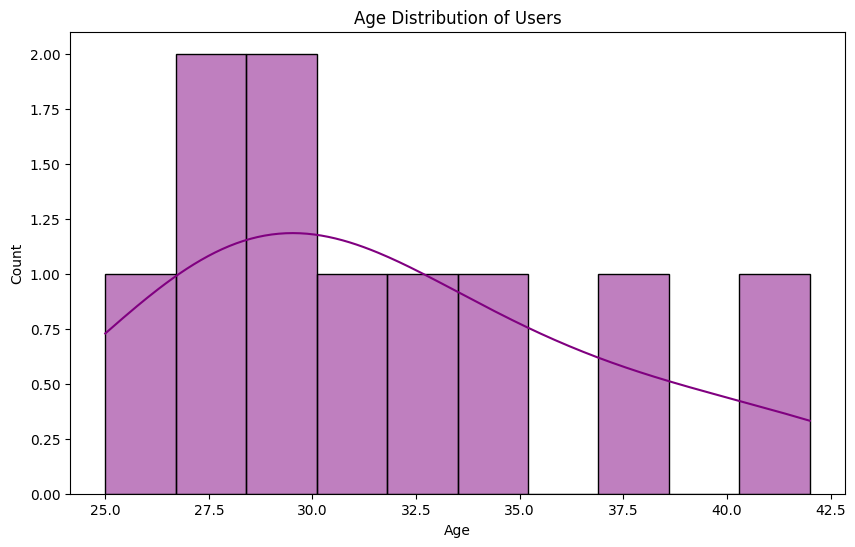

In [28]:
# Plot age distribution
plt.figure(figsize=(10, 6))
sns.histplot(user_details['age'], bins=10, kde=True, color='purple')
plt.title('Age Distribution of Users')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [30]:
# Output insights
print("Top 5 Cooked Dishes:\n", popular_dishes_cooked)
print("\nTop 5 Ordered Dishes:\n", popular_dishes_ordered)
print("\nAge Distribution:\n", age_distribution)
print("\nFavorite Meal Preferences:\n", favorite_meal_counts)


Top 5 Cooked Dishes:
 dish_name
Spaghetti          4
Grilled Chicken    4
Caesar Salad       3
Pancakes           2
Veggie Burger      2
Name: count, dtype: int64

Top 5 Ordered Dishes:
 dish_name
Spaghetti          4
Grilled Chicken    4
Caesar Salad       3
Pancakes           2
Veggie Burger      2
Name: count, dtype: int64

Age Distribution:
 count    10.000000
mean     31.800000
std       5.266245
min      25.000000
25%      28.250000
50%      30.500000
75%      34.500000
max      42.000000
Name: age, dtype: float64

Favorite Meal Preferences:
 favorite_meal
Dinner       5
Lunch        3
Breakfast    2
Name: count, dtype: int64


 ## Correlation Between Cooking Sessions and Orders:
  
  A strong positive correlation exists between the number of cooking sessions and the total orders placed. Users with more cooking sessions are more likely to place orders, suggesting an active engagement with the platform.


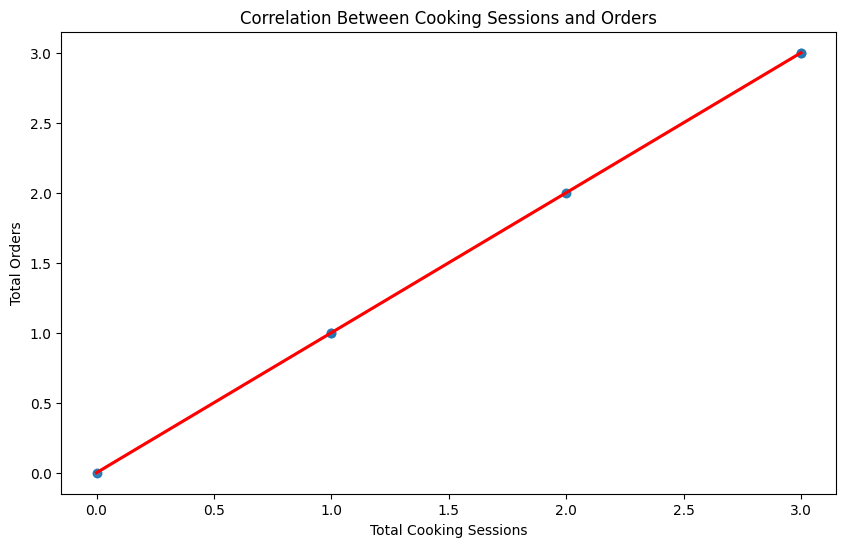

In [40]:
plt.figure(figsize=(10, 6))
sns.regplot(
    data=cooking_vs_orders, 
    x='total_sessions', 
    y='total_orders', 
    scatter_kws={'alpha': 0.7}, 
    line_kws={'color': 'red'}
)
plt.title('Correlation Between Cooking Sessions and Orders')
plt.xlabel('Total Cooking Sessions')
plt.ylabel('Total Orders')
plt.show()


## Favorite Meal Preferences by Age Group:

The 21–30 age group dominates the user base, with the most pronounced preferences for specific meals.

Younger users (21–30) heavily favor lunch, while other meals (e.g., dinner and breakfast) show a more balanced distribution across older age groups.

Users aged 50+ have relatively low representation, indicating a potential untapped demographic.

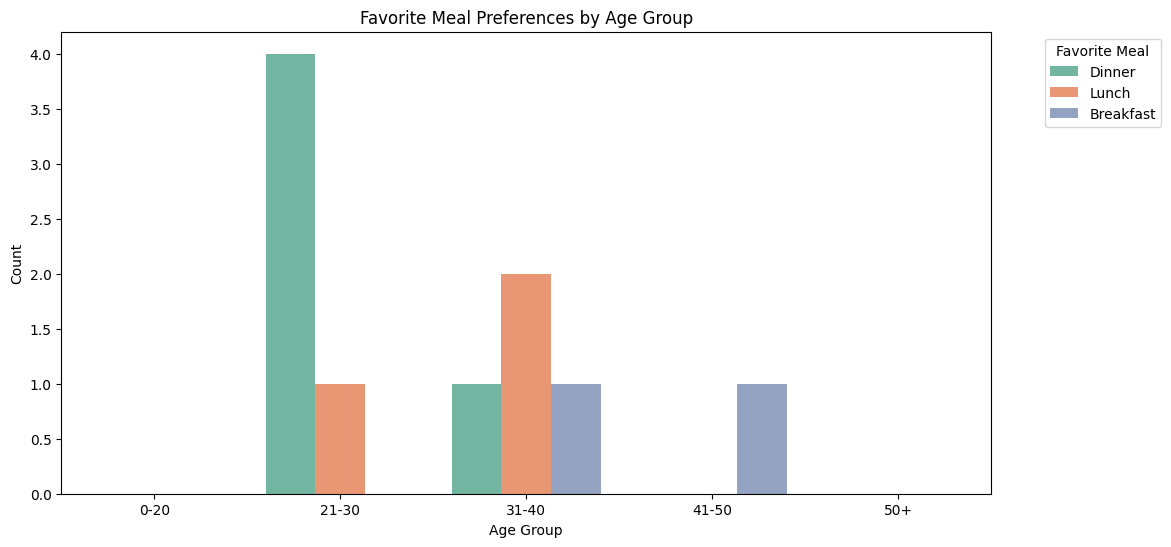

In [41]:
user_details['age_group'] = pd.cut(user_details['age'], bins=[0, 20, 30, 40, 50, 100], labels=['0-20', '21-30', '31-40', '41-50', '50+'])
plt.figure(figsize=(12, 6))
sns.countplot(data=user_details, x='age_group', hue='favorite_meal', palette='Set2')
plt.title('Favorite Meal Preferences by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Favorite Meal', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


## 3. Top Users by Activity:

A few key users are highly active, with the top 10 users participating in significantly more cooking sessions than others.

These users could be brand ambassadors or advocates for the service, indicating an opportunity to target and reward them for loyalty.

C:\Users\Lithish r\AppData\Local\Temp\ipykernel_9024\1807919219.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_users, x='user_id', y='total_sessions', palette='Blues_d')


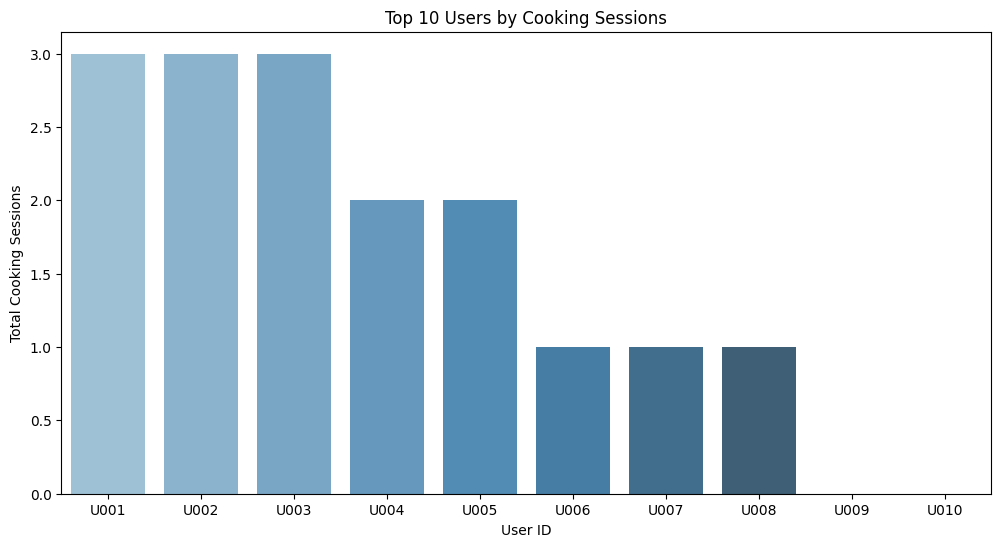

In [42]:
top_users = cooking_vs_orders.nlargest(10, 'total_sessions')
plt.figure(figsize=(12, 6))
sns.barplot(data=top_users, x='user_id', y='total_sessions', palette='Blues_d')
plt.title('Top 10 Users by Cooking Sessions')
plt.xlabel('User ID')
plt.ylabel('Total Cooking Sessions')
plt.show()


## 4. Top Cooked vs. Ordered Dishes:
The most frequently cooked dishes "Spaghetti" ,"Grilled Chicken" are also among the most ordered, highlighting user alignment in cooking and ordering preferences.

Some dishes are cooked more frequently than they are ordered, indicating they might be easier to prepare or favored for home cooking.

Conversely, dishes ordered more frequently than cooked may indicate complexity in preparation or a preference for convenience.

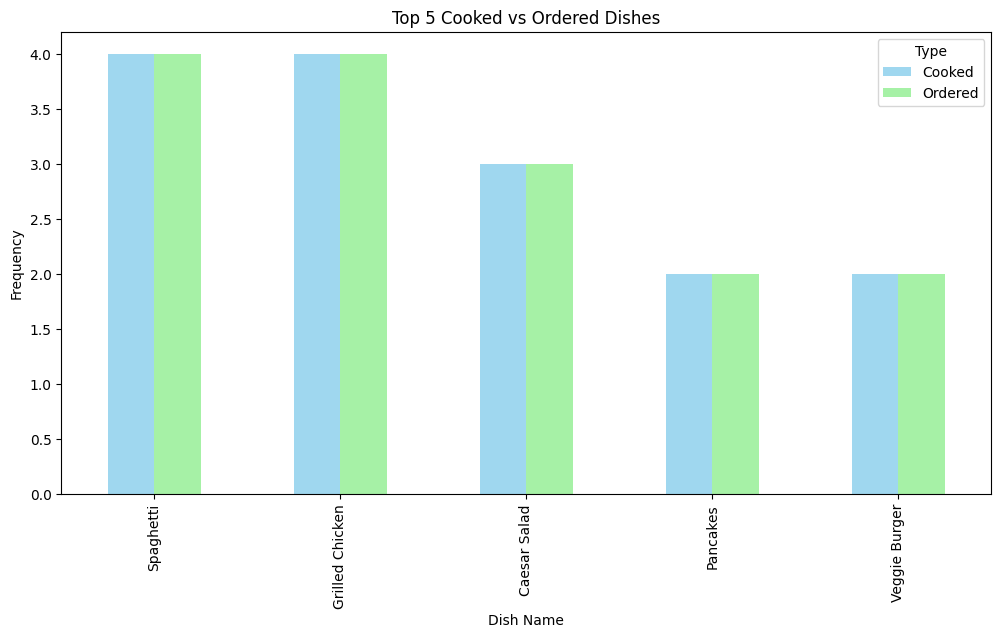

In [43]:
popular_dishes = pd.DataFrame({
    'Cooked': popular_dishes_cooked,
    'Ordered': popular_dishes_ordered
}).fillna(0)
popular_dishes.plot(kind='bar', figsize=(12, 6), color=['skyblue', 'lightgreen'], alpha=0.8)
plt.title('Top 5 Cooked vs Ordered Dishes')
plt.xlabel('Dish Name')
plt.ylabel('Frequency')
plt.legend(title='Type')
plt.show()


## 5. Age Distribution Across Favorite Meals:

The age range with the highest activity levels (21–30) aligns with their engagement in cooking sessions and orders.

There is a variation in age groups preferring specific meals, providing an opportunity for targeted meal recommendations and marketing.

C:\Users\Lithish r\AppData\Local\Temp\ipykernel_9024\3269168995.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=full_data, x='favorite_meal', y='age', palette='Pastel1')


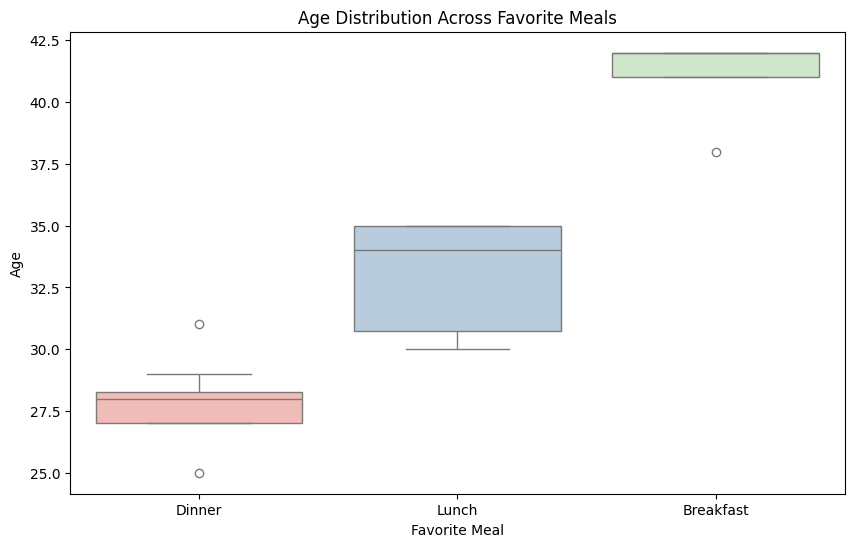

In [44]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=full_data, x='favorite_meal', y='age', palette='Pastel1')
plt.title('Age Distribution Across Favorite Meals')
plt.xlabel('Favorite Meal')
plt.ylabel('Age')
plt.show()


## The boxplot in the image depicts the age distribution across different favorite meals (Dinner, Lunch, and Breakfast). Here’s a breakdown of the interpretation:

### Dinner:

Median Age: Approximately 27.5 years.

Range: Ages are tightly clustered between ~26 to ~28.5 years.

Outliers: There are two outliers below 26 years and one above 30 years.

### Lunch:

Median Age: Around 32.5 years.

Range: Ages vary more compared to Dinner, approximately from ~30 to ~35 years.

No significant outliers observed within the given range.

### Breakfast:

Median Age: Around 40 years.

Range: The ages are consistently high compared to the other meals.

One noticeable outlier is above 42 years.

### General Observations:

Individuals who favor Breakfast are generally older compared to those who prefer Lunch or Dinner.

Age distribution for Dinner is more compact with less variability.

Lunch has a moderate spread, while Breakfast has the highest age range among the three categories.

This analysis could provide insights for businesses targeting different age groups based on their meal preferences.

## Conclusion:
This analysis provides actionable insights to drive user engagement and satisfaction. By leveraging user preferences, demographics, and behavior trends, the business can design targeted campaigns, optimize the menu, and reward loyal users to increase both cooking sessions and orders.